In [43]:
from PIL import Image 
import os
import numpy as np
from sklearn import svm, metrics
import matplotlib.pyplot as plt



In [44]:
current_dir= os.getcwd()
folder_path = ""+ current_dir +"\\test"
print(folder_path)
ListimagesTestNORMAL = []
ListimagesTestPNEUMONIA = []

folder_path_train= ""+ current_dir +"\\train"
ListimagesTrainNORMAL = []
ListimagesTrainPNEUMONIA = []

C:\Users\ferre\machine_learning\Dataset_IA\T_DEV_810_dataset\test


In [45]:
for filename in os.listdir(folder_path+'\\NORMAL'):
   
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Ouvrir l'image et l'ajouter à la liste
        img = Image.open(os.path.join(folder_path+'\\NORMAL', filename))
        # Couleur == variation de gris
        img2 = img.convert('L')
        ListimagesTestNORMAL.append(img2)
for filename in os.listdir(folder_path+'\\PNEUMONIA'): 
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        img = Image.open(os.path.join(folder_path+'\\PNEUMONIA', filename))
        img2 = img.convert('L')
        ListimagesTestPNEUMONIA.append(img2)

In [46]:
for filename in os.listdir(folder_path_train+'\\NORMAL'): 
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        img = Image.open(os.path.join(folder_path_train+'\\NORMAL', filename))
        img2 = img.convert('L')
        ListimagesTrainNORMAL.append(img2)
        
for filename in os.listdir(folder_path_train+'\\PNEUMONIA'):   
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"): 
        img = Image.open(os.path.join(folder_path_train+'\\PNEUMONIA', filename))
        img2 = img.convert('L')
        ListimagesTrainPNEUMONIA.append(img2)

In [47]:
print("Nombre d'images normal importées :", len(ListimagesTestNORMAL))
print("Nombre d'images Pneumonia importées :", len(ListimagesTestPNEUMONIA))

ListimagesTrainNORMAL[0].show()

Nombre d'images normal importées : 234
Nombre d'images Pneumonia importées : 390


In [48]:
ListimagesResizeTestNORMAL = []
ListimagesResizeTestPNEUMONIA = []

ListimagesResizeTrainNORMAL = []
ListimagesResizeTrainPNEUMONIA = []

In [49]:
#modifi la taille des images du dataset TEST
img0shape = (50, 50)

for img in ListimagesTestNORMAL :
    ListimagesResizeTestNORMAL.append(img.resize(img0shape))
    
for img in ListimagesTestPNEUMONIA :
    ListimagesResizeTestPNEUMONIA.append(img.resize(img0shape))


In [50]:
#modifi la taille des images du dataset TRAIN

for img in ListimagesTrainNORMAL :
    ListimagesResizeTrainNORMAL.append(img.resize(img0shape))
    
for img in ListimagesTrainPNEUMONIA :
    ListimagesResizeTrainPNEUMONIA.append(img.resize(img0shape))
    


In [51]:
min_pixel, max_pixel = 255, 0
for img in ListimagesResizeTrainPNEUMONIA:
    if np.min(img) < min_pixel:
        min_pixel = np.min(img)
    if np.max(img) > max_pixel:
        max_pixel = np.max(img)
min_pixel, max_pixel

(0, 255)

In [52]:
#On converti les images en vecteur 
X_normal_test = np.array([np.array(img).ravel() for img in ListimagesResizeTestNORMAL])
X_pneumonia_test = np.array([np.array(img).ravel() for img in ListimagesResizeTestPNEUMONIA])
#on prepare un liste contenant le cas normal et le cas pneumonia
X_test = np.concatenate((X_normal_test, X_pneumonia_test))
# 0 = normal et 1 =  pneumonia
y_test = np.concatenate((np.zeros(len(X_normal_test)), np.ones(len(X_pneumonia_test))))

#Tout pareil pour le TEST
X_normal = np.array([np.array(img).ravel() for img in ListimagesResizeTrainNORMAL])
X_pneumonia = np.array([np.array(img).ravel() for img in ListimagesResizeTrainPNEUMONIA])

X = np.concatenate((X_normal, X_pneumonia))
y = np.concatenate((np.zeros(len(X_normal)), np.ones(len(X_pneumonia))))




In [53]:
# Fit SVM classifier
clf = svm.SVC(gamma=0.001)
clf.fit(X, y)

SVC(gamma=0.001)

In [54]:
predicted = clf.predict(X_test)

In [55]:
print(predicted)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [56]:
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [57]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [58]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       234
         1.0       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624




C:\Users\ferre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[  0 234]
 [  0 390]]


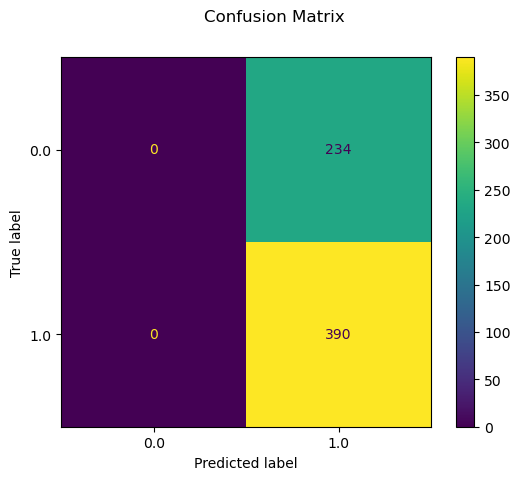

In [59]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
